In [1]:
import wget
filename =  "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
data = wget.download(filename)
print(data)

100% [..........................................................................] 1423529 / 1423529housing.csv


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv(data)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

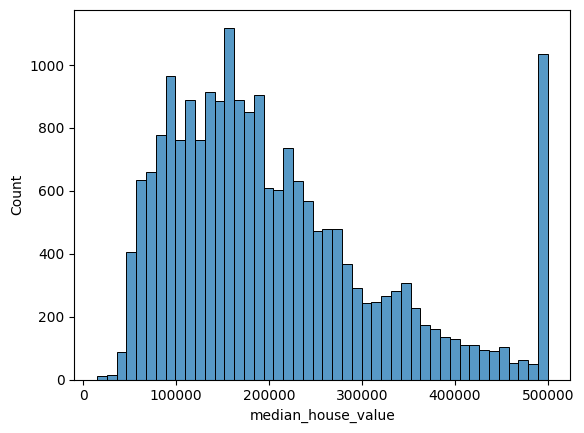

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df.median_house_value);

In [5]:
df_ocean = df[(df.ocean_proximity == "<1H OCEAN")] 
df_inland = df[(df.ocean_proximity == "INLAND")]

In [6]:
df_sample = pd.concat([df_ocean, df_inland])

In [7]:
df_sample = df_sample[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]

In [8]:
df_sample.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [9]:
df_sample.describe().round()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.0,15687.0,15687.0,15687.0,15530.0,15687.0,15687.0,15687.0,15687.0
mean,-119.0,35.0,27.0,2666.0,541.0,1466.0,501.0,4.0,191943.0
std,2.0,2.0,12.0,2258.0,436.0,1180.0,393.0,2.0,108801.0
min,-124.0,33.0,1.0,2.0,2.0,3.0,2.0,0.0,14999.0
25%,-121.0,34.0,17.0,1441.0,295.0,802.0,278.0,3.0,111300.0
50%,-118.0,34.0,27.0,2118.0,432.0,1195.0,406.0,3.0,166900.0
75%,-118.0,37.0,36.0,3172.0,645.0,1777.0,602.0,5.0,241100.0
max,-114.0,42.0,52.0,39320.0,6445.0,35682.0,6082.0,15.0,500001.0


In [10]:
len(df_sample)

15687

In [11]:
n = len(df_sample)

In [12]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n, n_val, n_test, n_train, n_val+n_test+n_train

(15687, 3137, 3137, 9413, 15687)

In [13]:
df_train = df_sample.iloc[:n_train]
df_val = df_sample.iloc[n_train:n_train+n_val]
df_test = df_sample.iloc[n_train+n_val:]

In [14]:
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

In [15]:
df_train = df_sample.iloc[idx[:n_train]]
df_val = df_sample.iloc[idx[n_train:n_train+n_val]]
df_test = df_sample.iloc[idx[n_train+n_val:]]

In [16]:
df_train = df_train.reset_index(drop=True).copy()
df_val = df_val.reset_index(drop=True).copy()
df_test = df_test.reset_index(drop=True).copy()

In [17]:
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

In [18]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [19]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [20]:
average_total_bedroom = df_train['total_bedrooms'].mean()
zero = 0

def missing_values(df, fill):
    df.copy()
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(fill)
    return df

In [21]:
X_zero = missing_values(df_train.copy(), zero).values

In [22]:
X_average = missing_values(df_train, average_total_bedroom).values

In [23]:
w0, w = train_linear_regression(X_zero, y_train)
y_pred = w0 + X_zero.dot(w)

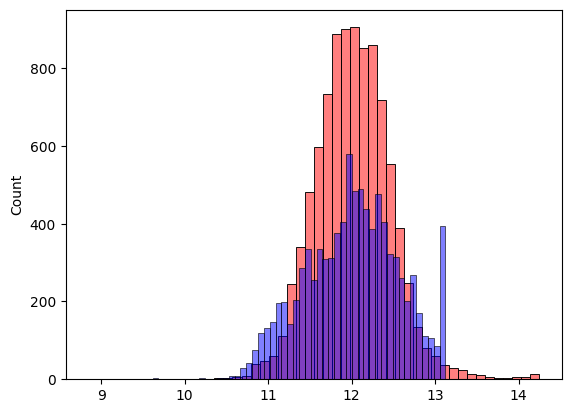

In [24]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50);

In [25]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)
rmse(y_train, y_pred)

0.34112464959900146

In [26]:
w0, w = train_linear_regression(X_average, y_train)

y_pred = w0 + X_average.dot(w)
rmse(y_train, y_pred)

0.34089524162722107

In [27]:
X_val = missing_values(df_val, average_total_bedroom).values


w0, w = train_linear_regression(X_val, y_val)
y_pred_avg = w0 + X_val.dot(w)
rmse(y_val, y_pred_avg).round(2)

0.34

In [28]:
X_val_zero = missing_values(df_val, zero).values

w0, w = train_linear_regression(X_val_zero, y_val)
y_pred_zero = w0 + X_val.dot(w)
rmse(y_val, y_pred_zero).round(2)

0.34

In [29]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [30]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    #X_val_zero = missing_values(df_val, zero).values
    
    w0 , w = train_linear_regression_reg(X_val_zero, y_val, r=r)

    # Validation

    y_pred = w0 + X_val_zero.dot(w)

    score = rmse(y_val, y_pred_zero).round(2)
    
    print(r, w0, score)

0 -8.146196321960604 0.34
1e-06 -8.146141699648526 0.34
0.0001 -8.14073774758312 0.34
0.001 -8.09193768021686 0.34
0.01 -7.634285319899564 0.34
0.1 -4.875941969318406 0.34
1 -1.054944317623302 0.34
5 -0.2331018974306134 0.34
10 -0.11678177458273911 0.34


In [31]:
rmse_scores = []
for s in [0,1,2,3,4,5,6,7,8,9]:
    
    np.random.seed(s)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_train = df_sample.iloc[idx[:n_train]]
    df_val = df_sample.iloc[idx[n_train:n_train+n_val]]
    df_test = df_sample.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_zero = missing_values(df_train, zero).values
    
    w0, w = train_linear_regression(X_zero, y_train)
    
    X_val_zero = missing_values(df_val, zero)
    
    y_pred_seed = w0 + X_val_zero.dot(w)

    score = np.round(rmse(y_val, y_pred_seed), 2)
    
    rmse_scores.append(score)
    print(s, score)

0 0.33
1 0.33
2 0.35
3 0.34
4 0.35
5 0.34
6 0.34
7 0.34
8 0.34
9 0.33


In [32]:
print(np.round(np.std(rmse_scores), 3))

0.007


In [39]:
r=r
s=42
np.random.seed(s)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df_sample.iloc[idx[:n_train]]
df_val = df_sample.iloc[idx[n_train:n_train+n_val]]
df_test = df_sample.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = missing_values(df_full_train, zero).values
y_full_train = np.concatenate([y_train, y_val])

#X_zero = missing_values(df_train, zero).values

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=r)

X_test = missing_values(df_test, zero)

y_pred_seed = w0 + X_test.dot(w)

score = np.round(rmse(y_test, y_pred_seed), 2)

rmse_scores.append(score)
print(score)

0.34
